
# Speed Dating – Notebook d'analyse (squelette)

Ce notebook vous aide à explorer le dataset de **speed dating** (2002–2004) et à répondre à la question :  
**Quels facteurs influencent l'acceptation d'un second rendez-vous ?**

> **Livrables attendus** : statistiques descriptives, visualisations, et interprétations.


In [5]:

# === Imports ===
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Règles graphiques du projet : utiliser matplotlib, un graphique par figure, pas de couleurs spécifiées
plt.rcParams['figure.figsize'] = (8, 5)
pd.set_option('display.max_columns', 120)



## 1. Chargement des données

- Indiquez le chemin vers votre fichier CSV (ou TSV).  
- Le dataset classique est souvent nommé `Speed Dating Data.csv` (ou similaire).  


In [8]:
df = pd.read_csv("./data/Speed+Dating+Data.csv",encoding='cp1252')

print(f"Shape: {df.shape}")
df.head()


Shape: (8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,...,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



## 2. Aperçu & dico des variables

- Regard sur la structure (`info`, `describe`, valeurs manquantes).
- Rappel des variables clés d'après le *data key* fourni.


In [15]:

# Vue d'ensemble
display(df.info())

# Taux de valeurs manquantes par variable
na_rate = df.isna().mean().sort_values(ascending=False)
na_rate.head(20)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


None

num_in_3    0.920267
numdat_3    0.821437
expnum      0.785152
sinc7_2     0.766651
amb7_2      0.766651
shar7_2     0.764383
attr7_2     0.763189
fun7_2      0.763189
intel7_2    0.763189
fun5_3      0.759370
amb5_3      0.759370
shar2_3     0.759370
attr5_3     0.759370
amb7_3      0.759370
shar7_3     0.759370
sinc5_3     0.759370
sinc7_3     0.759370
intel7_3    0.759370
fun7_3      0.759370
attr7_3     0.759370
dtype: float64


### Variables clés (extrait du Data Key)

- **match** (1/0) : match réciproque (deux "Yes").  
- **dec** / **dec_o** : décision du participant / du partenaire ce soir-là (1=Yes, 0=No).  
- **attr, sinc, intel, fun, amb, shar** : notes attribuées au partenaire lors du *date* (1–10).  
- **attr_o, ...** : notes que **le partenaire** vous attribue.  
- **pf_o_att** : préférences déclarées du partenaire (vagues/échelles différentes selon *wave*).  
- **samerace** : 1 si même origine ethnique, 0 sinon.  
- **age, age_o** : âge du participant / du partenaire.  
- **gender** : 0 = Femme, 1 = Homme.  
- **order** : numéro du rendez-vous dans la soirée.  
- **attr3_1, ..., amb3_1** : **auto-évaluations** (Time 1).  
- **attr1_1, ..., shar1_1** : **importance déclarée** des attributs (Time 1).

> ⚠️ Les *waves* ont des échelles différentes (1–10 vs budget 100). Il faudra **normaliser** si on compare.



## 3. Préparation & nettoyage minimal

- Typage des variables (catégorielles vs numériques).  
- Harmonisation des variables d'importance (si comparaison inter-*waves*).  
- Création de variables dérivées utiles.


In [25]:

# Copie de travail
data = df.copy()

# Harmonisation de quelques types
for col in ['match', 'dec', 'dec_o', 'samerace', 'gender']:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Sélection de colonnes d'intérêt disponibles
rating_cols = ['attr','sinc','intel','fun','amb','shar']
rating_o_cols = ['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o']

# Variable cible (ex. probabilité de "second date" côté participant)
target = 'dec' if 'dec' in data.columns else ('match' if 'match' in data.columns else None)
print("Cible choisie:", target)

# Filtre simple : on garde les lignes où la cible est connue
if target:
    data = data[~data[target].isna()].copy()

print("Shape après nettoyage minimal:", data.shape)


Cible choisie: dec
Shape après nettoyage minimal: (8378, 195)



## 4. Statistiques descriptives

- Répartition par **genre** et **âge**.  
- Moyennes des **notes reçues** et **données**.  
- Taux de *yes* / *match* global et par genre.


In [16]:

# Répartition par genre
if 'gender' in data.columns:
    print(data['gender'].value_counts(dropna=False))

# Statistiques d'âge
for c in ['age', 'age_o']:
    if c in data.columns:
        display(data[c].describe())

# Taux de "yes" (décision) et/ou "match"
for c in ['dec','dec_o','match']:
    if c in data.columns:
        rate = data[c].mean()
        print(f"Taux moyen {c}: {rate:.3f}")
        
# Moyennes des notes perçues des partenaires (si dispo)
if rating_o_cols:
    display(data[rating_o_cols].describe().T)

# Moyennes des notes données (si dispo)
if rating_cols:
    display(data[rating_cols].describe().T)


gender
1    4194
0    4184
Name: count, dtype: int64


count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

count    8274.000000
mean       26.364999
std         3.563648
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age_o, dtype: float64

Taux moyen dec: 0.420
Taux moyen dec_o: 0.420
Taux moyen match: 0.165


,count,mean,std,min,25%,50%,75%,max
attr_o,8166.0,6.190411,1.950305,0.0,5.0,6.0,8.0,10.5
sinc_o,8091.0,7.175256,1.740575,0.0,6.0,7.0,8.0,10.0
intel_o,8072.0,7.369301,1.550501,0.0,6.0,7.0,8.0,10.0
fun_o,8018.0,6.400599,1.954078,0.0,5.0,7.0,8.0,11.0
amb_o,7656.0,6.778409,1.794080,0.0,6.0,7.0,8.0,10.0
shar_o,7302.0,5.474870,2.156163,0.0,4.0,6.0,7.0,10.0


,count,mean,std,min,25%,50%,75%,max
attr,8176.0,6.189995,1.950169,0.0,5.0,6.0,8.0,10.0
sinc,8101.0,7.175164,1.740315,0.0,6.0,7.0,8.0,10.0
intel,8082.0,7.368597,1.550453,0.0,6.0,7.0,8.0,10.0
fun,8028.0,6.400598,1.953702,0.0,5.0,7.0,8.0,10.0
amb,7666.0,6.777524,1.794055,0.0,6.0,7.0,8.0,10.0
shar,7311.0,5.474559,2.156363,0.0,4.0,6.0,7.0,10.0



## 5. Visualisations

> Rappel : matplotlib uniquement, un graphique par figure, pas de couleurs spécifiées.

### 5.1 Distributions des notes (histogrammes)


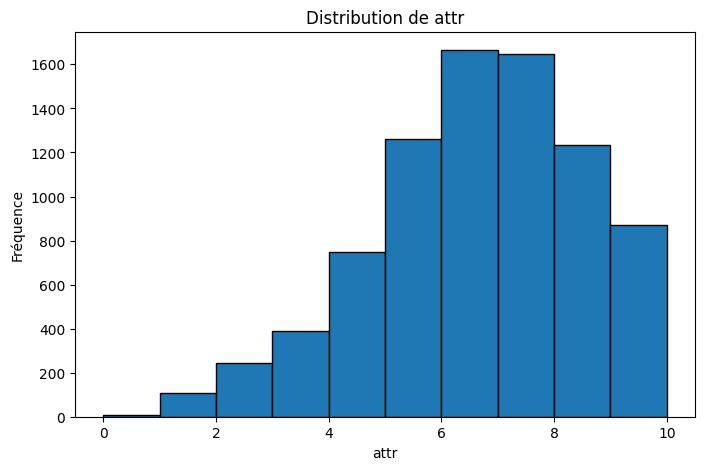

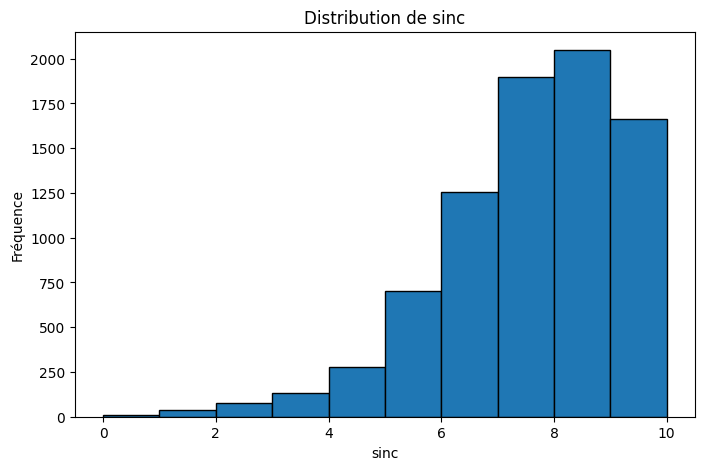

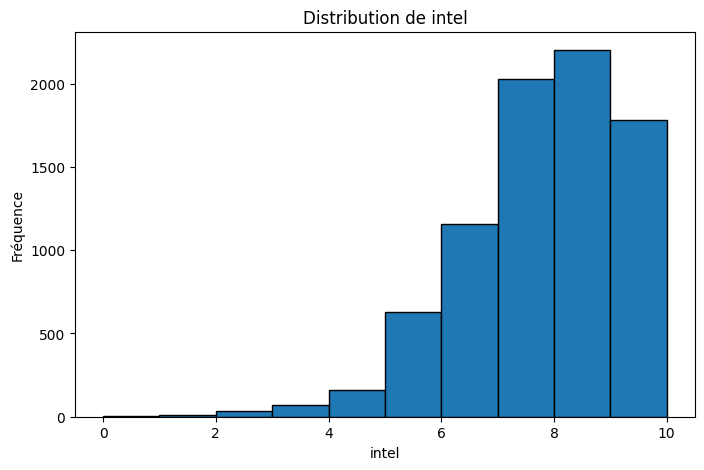

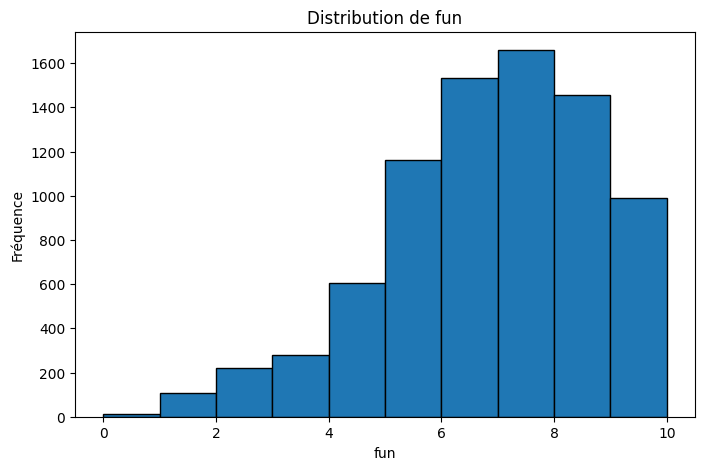

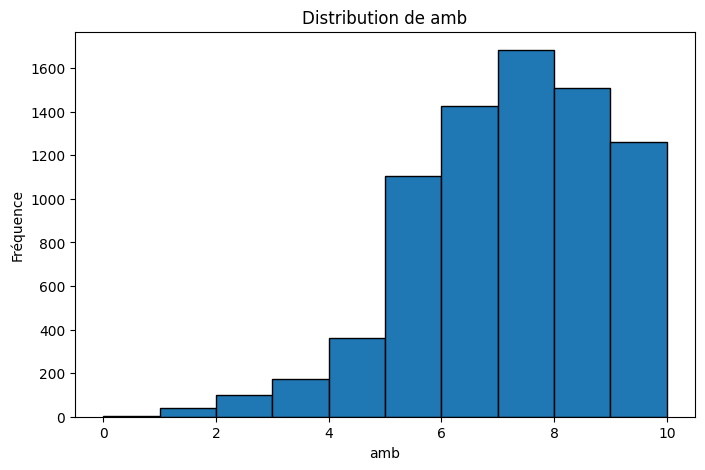

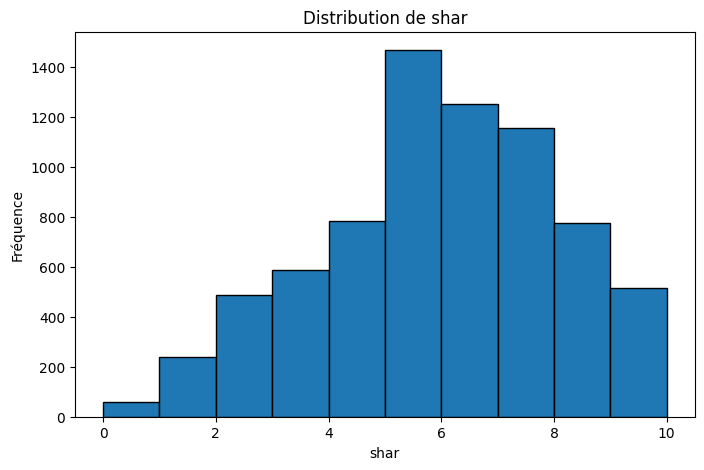

In [17]:

# Histogrammes des notes données au partenaire
for c in rating_cols:
    plt.figure()
    data[c].dropna().plot(kind='hist', bins=10, edgecolor='black')
    plt.title(f"Distribution de {c}")
    plt.xlabel(c)
    plt.ylabel('Fréquence')
    plt.show()



### 5.2 Comparaison des notes reçues par genre (boxplots)


C:\Users\bonna\AppData\Local\Temp\ipykernel_11660\508866954.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(int(g)) for g in sorted(sub['gender'].dropna().unique())])


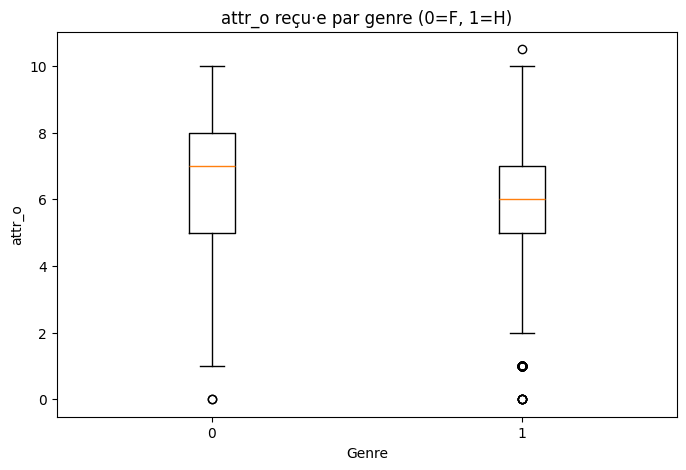

C:\Users\bonna\AppData\Local\Temp\ipykernel_11660\508866954.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(int(g)) for g in sorted(sub['gender'].dropna().unique())])


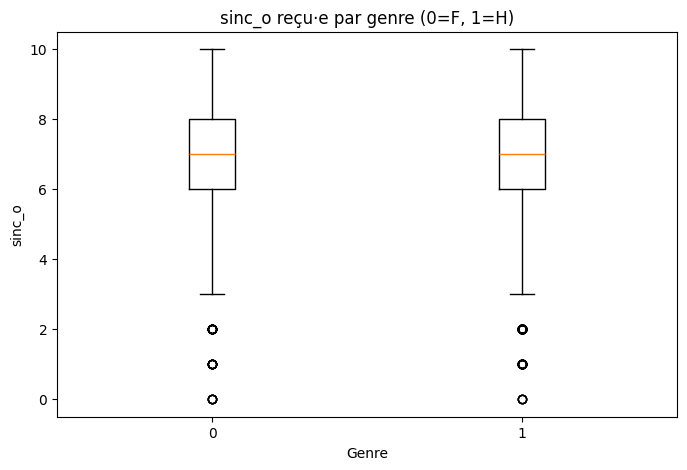

C:\Users\bonna\AppData\Local\Temp\ipykernel_11660\508866954.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(int(g)) for g in sorted(sub['gender'].dropna().unique())])


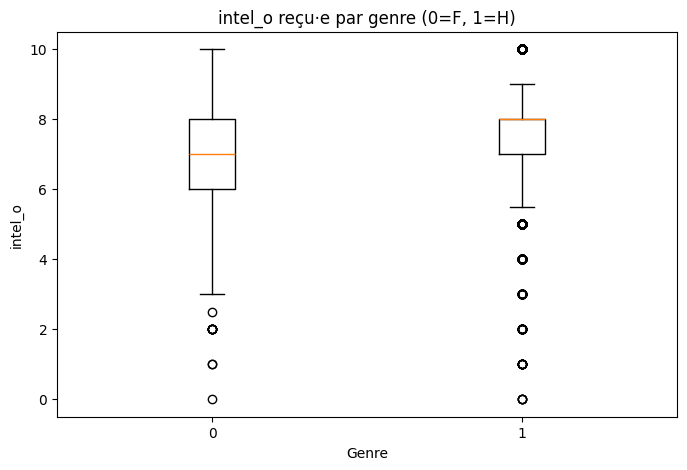

C:\Users\bonna\AppData\Local\Temp\ipykernel_11660\508866954.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(int(g)) for g in sorted(sub['gender'].dropna().unique())])


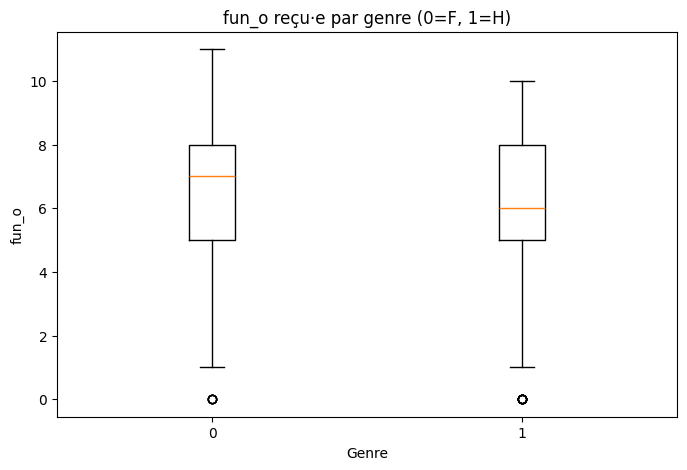

C:\Users\bonna\AppData\Local\Temp\ipykernel_11660\508866954.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(int(g)) for g in sorted(sub['gender'].dropna().unique())])


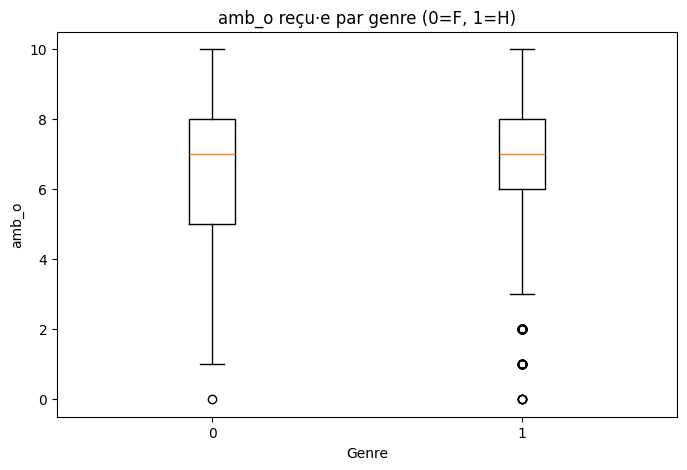

C:\Users\bonna\AppData\Local\Temp\ipykernel_11660\508866954.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(int(g)) for g in sorted(sub['gender'].dropna().unique())])


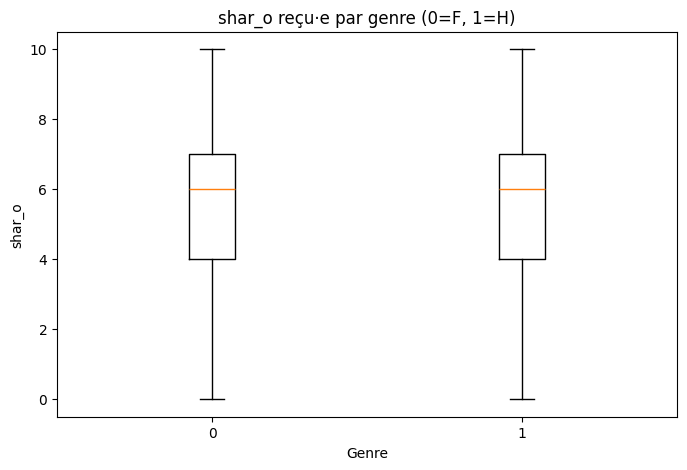

In [20]:

if 'gender' in data.columns and rating_o_cols:
    for c in rating_o_cols:
        plt.figure()
        # Boxplot simple par genre
        sub = data[['gender', c]].dropna()
        groups = [sub[sub['gender']==g][c].values for g in sorted(sub['gender'].dropna().unique())]
        plt.boxplot(groups, labels=[str(int(g)) for g in sorted(sub['gender'].dropna().unique())])
        plt.title(f"{c} reçu·e par genre (0=F, 1=H)")
        plt.xlabel('Genre')
        plt.ylabel(c)
        plt.show()



### 5.3 Corrélations avec la décision de second rendez-vous


dec        1.000000
attr       0.486775
fun        0.414477
shar       0.400644
intel      0.217313
sinc       0.209994
amb        0.183659
intel_o    0.081869
sinc_o     0.081447
amb_o      0.063330
shar_o     0.057808
fun_o      0.044162
attr_o    -0.059360
Name: dec, dtype: float64

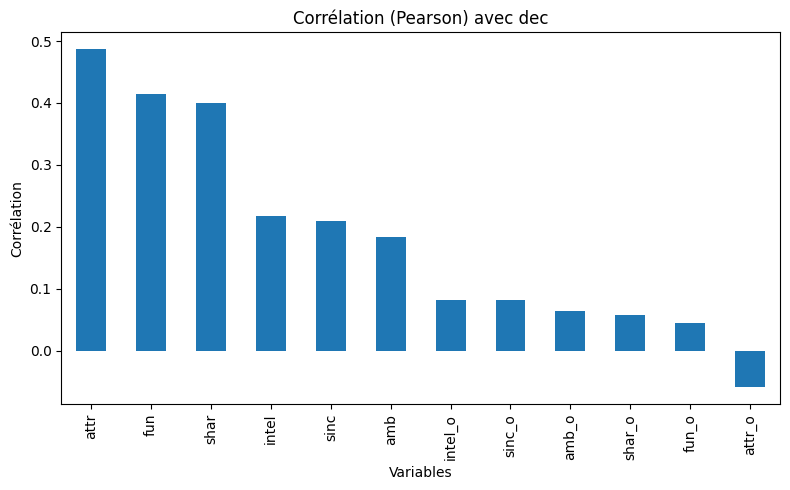

In [21]:

# Corrélations simples entre notes et décision
if target and (rating_cols + rating_o_cols):
    num_cols = [c for c in rating_cols + rating_o_cols if c in data.columns]
    corr = data[num_cols + [target]].corr(numeric_only=True)[target].sort_values(ascending=False)
    display(corr)
    
    plt.figure()
    corr.drop(labels=[target]).plot(kind='bar')
    plt.title(f"Corrélation (Pearson) avec {target}")
    plt.xlabel('Variables')
    plt.ylabel('Corrélation')
    plt.tight_layout()
    plt.show()



### 5.4 Shared interests vs Same race


In [22]:

# Taux de "yes" selon intérêts partagés (approx via 'shar' élevé ?) vs 'samerace'
def rate_by_binary(col, threshold=None):
    if col not in data.columns:
        return None
    if threshold is not None:
        # Binarisation par seuil si note
        s = (data[col] >= threshold).astype(float)
    else:
        s = data[col]
    return data.groupby(s)[target].mean()

if target:
    # Même race
    if 'samerace' in data.columns:
        print("Taux par même origine ethnique (0/1):")
        print(data.groupby('samerace')[target].mean().round(3))

    # Intérêts partagés — proxy : note 'shar' donnée (>=7)
    if 'shar' in data.columns:
        print("\nTaux par 'shared interests' élevés (shar>=7):")
        res = rate_by_binary('shar', threshold=7)
        if res is not None:
            print(res.round(3))


Taux par même origine ethnique (0/1):
samerace
0    0.411
1    0.434
Name: dec, dtype: float64

Taux par 'shared interests' élevés (shar>=7):
shar
0.0    0.318
1.0    0.668
Name: dec, dtype: float64



### 5.5 Auto-perception vs perception réelle


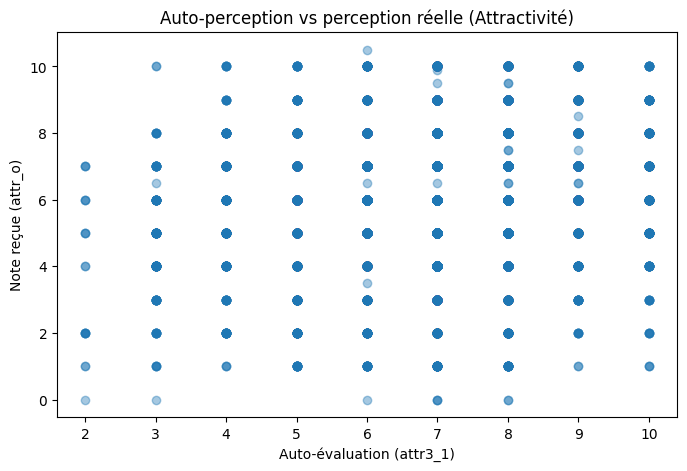

Corrélation attr3_1 vs attr_o: 0.175


In [23]:

# Ex.: attractivité auto-évaluée (attr3_1) vs note reçue (attr_o)
x_col, y_col = 'attr3_1', 'attr_o'
if x_col in data.columns and y_col in data.columns:
    sub = data[[x_col, y_col]].dropna()
    if not sub.empty:
        plt.figure()
        plt.scatter(sub[x_col], sub[y_col], alpha=0.4)
        plt.title("Auto-perception vs perception réelle (Attractivité)")
        plt.xlabel("Auto-évaluation (attr3_1)")
        plt.ylabel("Note reçue (attr_o)")
        plt.show()
        corr_xy = sub.corr(numeric_only=True).loc[x_col, y_col]
        print(f"Corrélation {x_col} vs {y_col}: {corr_xy:.3f}")



### 5.6 Effet de l'ordre dans la soirée


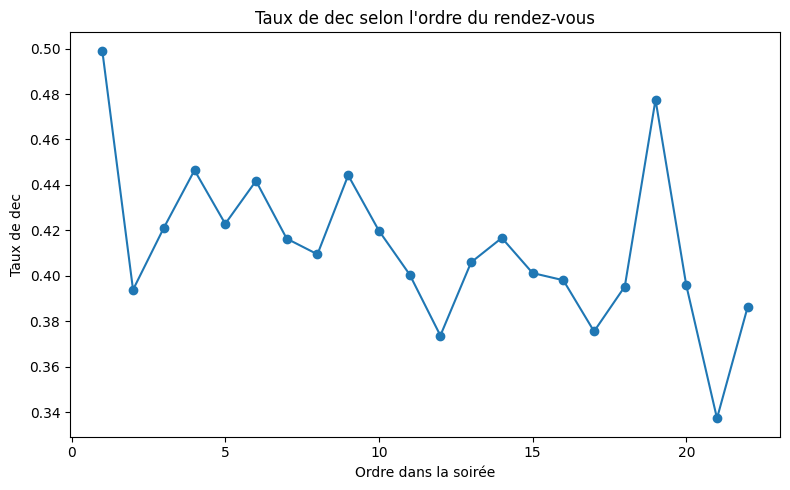

In [24]:

if target and 'order' in data.columns:
    order_rate = data.groupby('order')[target].mean()
    plt.figure()
    order_rate.plot(kind='line', marker='o')
    plt.title(f"Taux de {target} selon l'ordre du rendez-vous")
    plt.xlabel("Ordre dans la soirée")
    plt.ylabel(f"Taux de {target}")
    plt.tight_layout()
    plt.show()
    order_rate.head()



## 6. (Optionnel) Modèle explicatif simple

Un modèle logistique **interprétable** permet d'estimer l'effet marginal de quelques variables (contrôles simples).  
> ⚠️ Cette cellule suppose `scikit-learn` disponible. Sinon, laissez-la de côté.


In [ ]:

try:
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
except Exception as e:
    print("scikit-learn indisponible. Passez cette section si nécessaire.")
    LogisticRegression = None

if target and LogisticRegression is not None:
    features = [c for c in ['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','age_o','samerace','order','gender'] if c in data.columns]
    sub = data.dropna(subset=[target] + features).copy()
    if not sub.empty:
        X = sub[features].values
        y = sub[target].values.astype(int)

        pipe = Pipeline([('scaler', StandardScaler(with_mean=True)), 
                         ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))])
        pipe.fit(X, y)

        coefs = pipe.named_steps['clf'].coef_[0]
        coef_df = pd.DataFrame({'feature': features, 'coef': coefs}).sort_values('coef', ascending=False)
        display(coef_df)

        plt.figure()
        coef_df.set_index('feature')['coef'].plot(kind='bar')
        plt.title("Coefficients (log-odds) – modèle logistique")
        plt.xlabel('Variables')
        plt.ylabel('Coefficient')
        plt.tight_layout()
        plt.show()
    else:
        print("Échantillon vide après suppression des NA pour le modèle.")



## 7. Interprétation & insights

- **Quel(s) attribut(s)** ressort(ent) comme les plus liés au second rendez-vous ?  
- **Différences H/F** (si visibles).  
- **Intérêts partagés vs même origine** : lequel pèse le plus ?  
- **Auto-perception vs réel** : corrélation faible/forte ?  
- **Effet de l'ordre** : tendance notable ?

> **Implications pour Tinder** : comment améliorer les profils (photos, hobbies, mise en avant des centres d'intérêts), UX (ordre/rotation), et la personnalisation.



## 8. Conclusion

- Récapitulatif des insights clés.  
- Limites (biais d'échantillon, anciennes vagues, échelles différentes selon *wave*).  
- Ouverture (modèles prédictifs, tests de robustesse, segments d'utilisateurs).  
